Processing /kaggle/input/ins-cap/cap-ins/ins1.edf
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-1-b7d0eac57e16>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-1-b7d0eac57e16>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 12287999  =      0.000 ... 47999.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


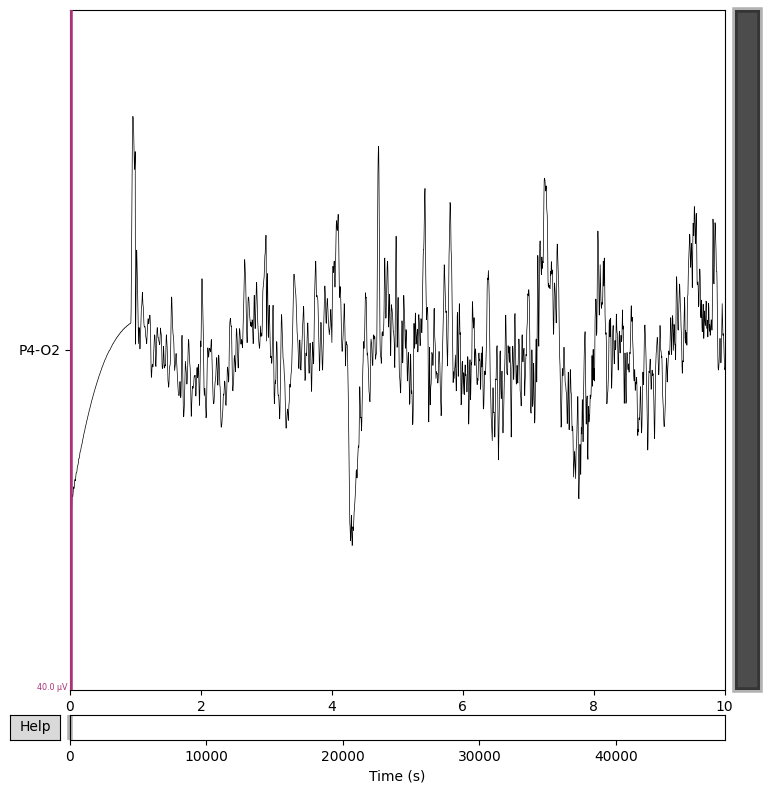

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 8449 samples (33.004 s)



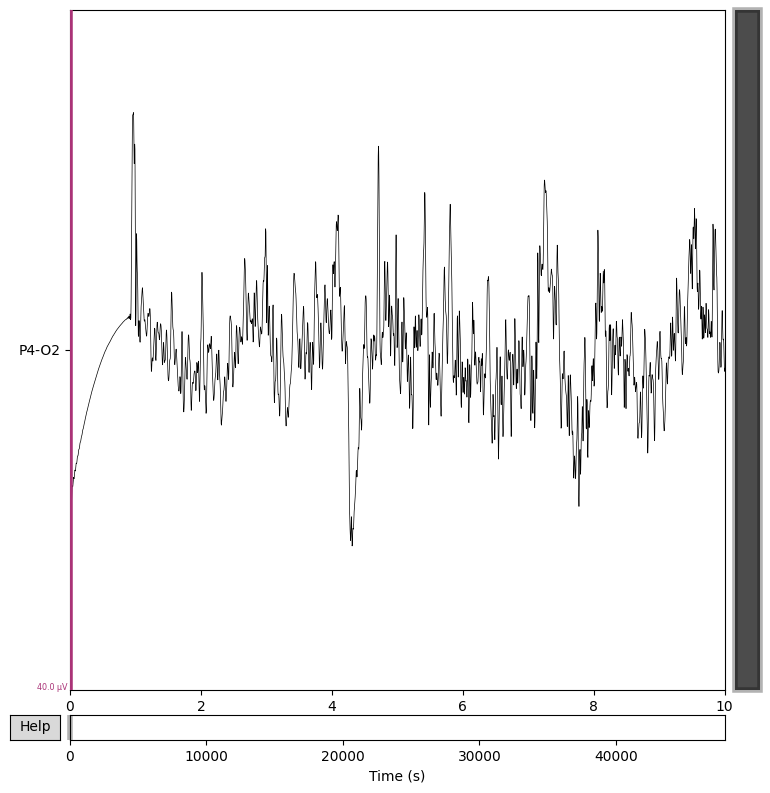

Not setting metadata
48000 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48000 events and 257 original time points ...
1 bad epochs dropped


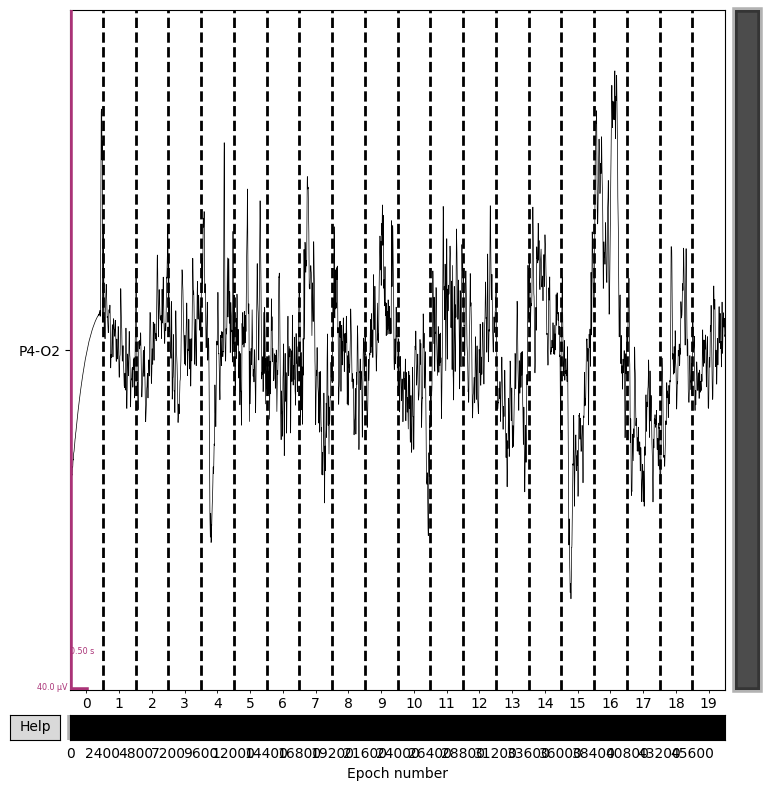

File /kaggle/input/ins-cap/cap-ins/ins1.edf - Epoch 1: Mean = -5.834439473881213e-07, STD = 4.405950824688194e-06, Power = 5.076472043893804e-09
File /kaggle/input/ins-cap/cap-ins/ins1.edf - Epoch 2: Mean = 3.097021372506238e-07, STD = 1.8309644891103832e-06, Power = 8.862250181696186e-10
File /kaggle/input/ins-cap/cap-ins/ins1.edf - Epoch 3: Mean = 6.551954398133361e-07, STD = 2.3413686861284397e-06, Power = 1.519201115904897e-09
File /kaggle/input/ins-cap/cap-ins/ins1.edf - Epoch 4: Mean = 5.672315323067662e-07, STD = 2.168207197157435e-06, Power = 1.2908786336894339e-09
File /kaggle/input/ins-cap/cap-ins/ins1.edf - Epoch 5: Mean = 2.2984297199798439e-07, STD = 4.8319986125082495e-06, Power = 6.0140668644460385e-09
File /kaggle/input/ins-cap/cap-ins/ins1.edf - Epoch 6: Mean = 6.989764236802349e-07, STD = 2.734846571691962e-06, Power = 2.0477641295699157e-09
File /kaggle/input/ins-cap/cap-ins/ins1.edf - Epoch 7: Mean = -1.0717370952936196e-06, STD = 2.0145899148957346e-06, Power = 1.3

<ipython-input-1-b7d0eac57e16>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-1-b7d0eac57e16>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 25727999  =      0.000 ... 50249.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


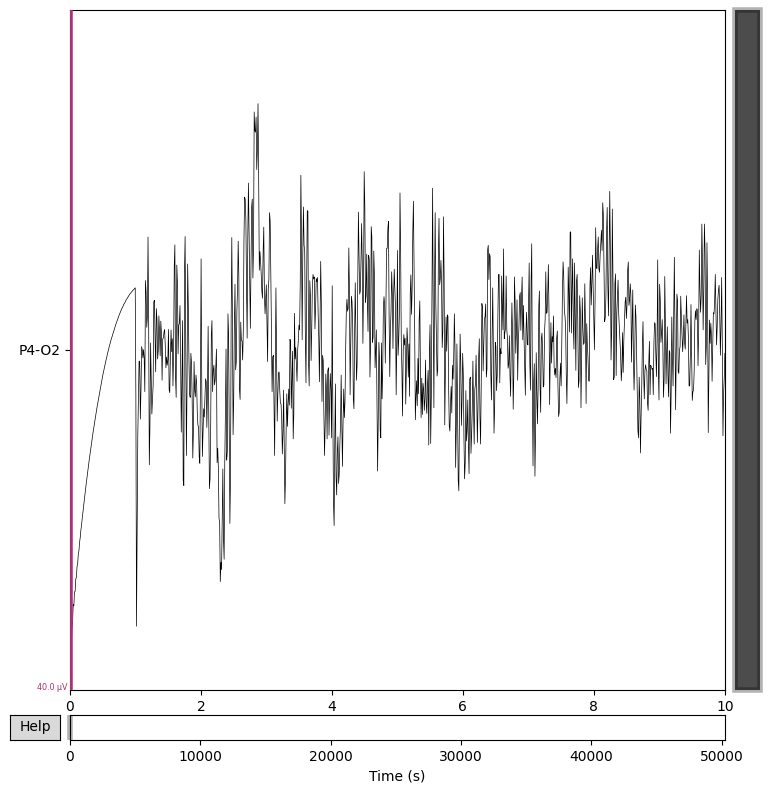

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16897 samples (33.002 s)



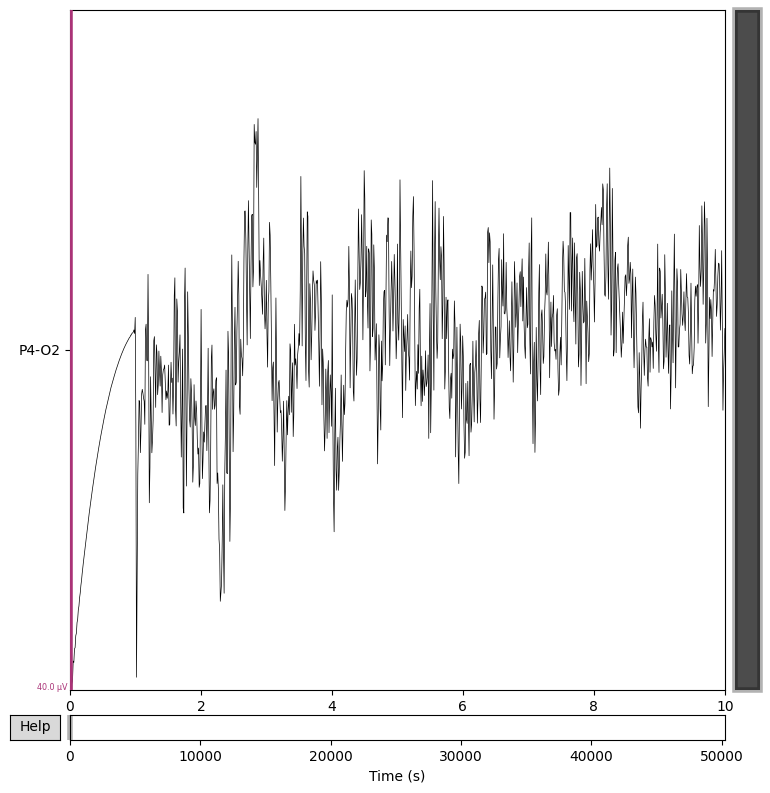

Not setting metadata
50250 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 50250 events and 513 original time points ...
1 bad epochs dropped


In [ ]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# List of EDF file paths
edf_files = [
    "/kaggle/input/ins-cap/cap-ins/ins1.edf",
    "/kaggle/input/ins-cap/cap-ins/ins2.edf",
    "/kaggle/input/ins-cap/cap-ins/ins3.edf",
    "/kaggle/input/ins-cap/cap-ins/ins4.edf",
    "/kaggle/input/ins-cap/cap-ins/ins5.edf",
    "/kaggle/input/ins-cap/cap-ins/ins6.edf",
    "/kaggle/input/ins-cap/cap-ins/ins7.edf",
    "/kaggle/input/ins-cap/cap-ins/ins8.edf",
    "/kaggle/input/ins-cap/cap-ins/ins9.edf",
]

for edf_file in edf_files:
    print(f"Processing {edf_file}")
    
    # Load the raw data
    raw = mne.io.read_raw_edf(edf_file, preload=True)
    
    # Pick the P4-O2 channel (if available)
    try:
        p4_o2_raw = raw.copy().pick_channels(['P4-O2'])
        
        # Plot raw P4-O2 channel (before filtering)
        p4_o2_raw.plot()  # Plot the raw signal
        
        # Apply a gentle band-pass filter (0.1-50 Hz)
        p4_o2_raw.filter(l_freq=0.1, h_freq=50, fir_design='firwin')
        p4_o2_raw.plot()  # Plot after filtering
        
        # Create events (1-second epochs)
        sfreq = int(raw.info['sfreq'])
        events = np.arange(0, len(p4_o2_raw.times), sfreq)  # 1-second interval events
        event_id = 1  # Dummy event ID
        
        # Ensure that events are in the proper format: (n_events, 3)
        events_array = np.column_stack((events, np.zeros(len(events), dtype=int), np.full(len(events), event_id, dtype=int)))
        
        # Create epochs
        epochs = mne.Epochs(
            p4_o2_raw, events=events_array, event_id=event_id, tmin=0, tmax=1, baseline=None, preload=True
        )
        
        # Plot epochs
        epochs.plot()
        
        # Extract features from epochs (Mean, STD, Power)
        epoch_data = epochs.get_data()[:, 0, :]
        for i, epoch in enumerate(epoch_data):
            mean_val = np.mean(epoch)
            std_val = np.std(epoch)
            power = np.sum(epoch**2)
            
            print(f"File {edf_file} - Epoch {i+1}: Mean = {mean_val}, STD = {std_val}, Power = {power}")
            
    except KeyError:
        print(f"P4-O2 channel not found in {edf_file}")
        continue
       


In [4]:
pip install mne


Note: you may need to restart the kernel to use updated packages.


In [6]:
import mne
from mne.io import read_raw_edf
#1) load EEG data, apply filter, select any one EEG channel- let's say P4-O2
#2) take insomnia and controls (healthy) for now (only 2 groups)
#3) 9 subjects are there in both, download all files (txt and edf)
#4) extract some features from each 1s epoch (for features you need to look little bit into literature) 
#and once you derive features from 1s epochs for all files from both groups, 
#you can apply a ML model to classify CAP/non-CAP events for each group.import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the file without preloading to handle large data more efficiently
file_path = "/kaggle/input/ins-cap/cap-ins/ins1.edf"
raw = read_raw_edf(file_path, preload=False)



Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-946c83de1c52>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(file_path, preload=False)
<ipython-input-6-946c83de1c52>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(file_path, preload=False)


In [42]:
# Pick only the desired channel (Fp2-F4)
raw_fp2_f4 = raw.copy().pick_channels(['Fp2-F4'])
raw_fp2_f4.load_data()
# Apply a band-pass filter (e.g., 1-40 Hz)
raw_fp2_f4.filter(l_freq=1, h_freq=40)

# Create epochs of 1 second each
events = mne.make_fixed_length_events(raw_fp2_f4, duration=1.0)  # Events every 1 second
epochs = mne.Epochs(raw_fp2_f4, events, tmin=0, tmax=1.0, baseline=None, preload=True)
print(epochs)
print(epochs.get_data().shape)  # Shape is (number of epochs, number of channels, number of time points)


# Summary of processed data
#epochs.summary()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading 0 ... 12287999  =      0.000 ... 47999.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

Not setting metadata
48000 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48000 events and 257 original time points ...
1 bad epochs dropped
<Epochs | 47999 events (all good), 0 – 1 s (baseline off), ~94.1 MB, data loaded,
 '1': 47

In [30]:
#p4_o2_raw.filter(l_freq=0.5, h_freq=40)
#events = mne.make_fixed_length_events(p4_o2_raw, start=0, stop=None, duration=1.0)
#epochs = mne.Epochs(p4_o2_raw, events, tmin=0, tmax=1.0, baseline=None, detrend=1, preload=True)
#print(epochs)
#epochs.plot()


In [12]:
pip install pyedm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 97.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install EMD-signal


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
from scipy.signal import welch
from scipy.stats import entropy
from PyEMD import EMD
# Assuming `epoch` is a 1-second array
def extract_features(epoch, sampling_rate):
    features = {}

    # 1. Zero-Crossing Ratio (ZCRϕ)
    zcr = np.sum(epoch[:-1] * epoch[1:] < 0) / len(epoch)
    features['ZCR'] = zcr

    # 2. Variance (s)
    features['Variance'] = np.var(epoch)

    # 3. Spectral Area
    freqs, psd = welch(epoch, fs=sampling_rate)
    features['Spec_area'] = np.sum(psd)

    # 4. Shannon Entropy (ShEnt)
    hist, _ = np.histogram(epoch, bins=100, density=True)
    features['ShEnt'] = entropy(hist + 1e-12)  # Add a small constant to avoid log(0)

    # 5. Max Frequency
    features['Max_freq'] = freqs[np.argmax(psd)]

    # 6. Mean Frequency
    features['Mean_freq'] = np.sum(freqs * psd) / np.sum(psd)

    # 7. Empirical Mode Decomposition (EMDl)
    emd = EMD()
    imfs = emd(epoch)
    features['EMDl'] = len(imfs)  # Example: Number of IMFs

    # Add placeholders for features requiring additional work
    features['MMSD'] = 'Requires wavelet transform'
    features['TEO'] = 'To be implemented'
    features['LZC'] = 'Binary encoding required'
    features['Cϕ,τ'] = 'Cross-correlation needed'
    features['FD'] = 'Katz/Higuchi method'
    
    return features

# Example usage
sampling_rate = 256  # Hz
epoch = np.random.randn(sampling_rate)  # Example 1-second epoch
features = extract_features(epoch, sampling_rate)
print(features)


{'ZCR': 0.515625, 'Variance': 1.0115444553112072, 'Spec_area': 0.9033836580750911, 'ShEnt': 4.043617601176352, 'Max_freq': 39.0, 'Mean_freq': 63.99074356091037, 'EMDl': 6, 'MMSD': 'Requires wavelet transform', 'TEO': 'To be implemented', 'LZC': 'Binary encoding required', 'Cϕ,τ': 'Cross-correlation needed', 'FD': 'Katz/Higuchi method'}


In [43]:
import numpy as np
from scipy.signal import welch
from scipy.stats import entropy
from PyEMD import EMD

# Feature extraction function for a single epoch
def extract_features(epoch, sampling_rate):
    features = {}

    # 1. Zero-Crossing Ratio (ZCRϕ)
    zcr = np.sum(epoch[:-1] * epoch[1:] < 0) / len(epoch)
    features['ZCR'] = zcr

    # 2. Variance (s)
    features['Variance'] = np.var(epoch)

    # 3. Spectral Area
    freqs, psd = welch(epoch, fs=sampling_rate)
    features['Spec_area'] = np.sum(psd)

    # 4. Shannon Entropy (ShEnt)
    hist, _ = np.histogram(epoch, bins=100, density=True)
    features['ShEnt'] = entropy(hist + 1e-12)  # Add a small constant to avoid log(0)

    # 5. Max Frequency
    features['Max_freq'] = freqs[np.argmax(psd)]

    # 6. Mean Frequency
    features['Mean_freq'] = np.sum(freqs * psd) / np.sum(psd)

    # 7. Empirical Mode Decomposition (EMDl)
    emd = EMD()
    imfs = emd(epoch)
    features['EMDl'] = len(imfs)  # Example: Number of IMFs

    # Add placeholders for features requiring additional work
    features['MMSD'] = 'Requires wavelet transform'
    features['TEO'] = 'To be implemented'
    features['LZC'] = 'Binary encoding required'
    features['Cϕ,τ'] = 'Cross-correlation needed'
    features['FD'] = 'Katz/Higuchi method'

    return features

# Extract features for all epochs in the dataset
def extract_features_from_epochs(epochs, sampling_rate, channel_idx=0):
    data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_samples_per_epoch)
    features_list = []

    for epoch_idx, epoch_data in enumerate(data):
        # Select the specific channel
        signal = epoch_data[channel_idx]
        
        # Extract features for the channel signal
        features = extract_features(signal, sampling_rate)
        features['Epoch'] = epoch_idx  # Add epoch index for tracking
        features_list.append(features)

    return features_list

# Example Usage
sampling_rate = int(epochs.info['sfreq'])  # Sampling frequency from the MNE epochs object
features_per_epoch = extract_features_from_epochs(epochs, sampling_rate)

# Print the extracted features for the first epoch
print(features_per_epoch[0])


{'ZCR': 0.007782101167315175, 'Variance': 6.867918902942971e-11, 'Spec_area': 1.5737768122729094e-11, 'ShEnt': 3.982314603912372, 'Max_freq': 1.0, 'Mean_freq': 1.0069541142757072, 'EMDl': 2, 'MMSD': 'Requires wavelet transform', 'TEO': 'To be implemented', 'LZC': 'Binary encoding required', 'Cϕ,τ': 'Cross-correlation needed', 'FD': 'Katz/Higuchi method', 'Epoch': 0}


In [44]:
import pandas as pd

# Convert the extracted features into a DataFrame
features_df = pd.DataFrame(features_per_epoch)

# Define the output file path
output_csv_path = r'/kaggle/working/epoch_features4.csv'

# Save the DataFrame to a CSV file
features_df.to_csv(output_csv_path, index=False)

output_csv_path
#data1 = pd.read_csv("/kaggle/working/epoch_features3.csv")
#data1

'/kaggle/working/epoch_features4.csv'

In [31]:
data1 = data1.drop(columns=['MMSD', 'TEO', 'LZC', 'Cϕ,τ', 'FD', 'Epoch'])
data1

ZCR      Variance     Spec_area     ShEnt  Max_freq  Mean_freq  \
0      0.007782  6.867919e-11  1.573777e-11  3.982315       1.0   1.006954   
1      0.085603  6.094555e-12  3.896744e-12  3.818218       1.0   4.887670   
2      0.077821  4.283665e-12  2.857314e-12  4.023280       1.0   6.959450   
3      0.031128  2.362578e-11  1.268306e-11  4.107123       1.0   2.173227   
4      0.031128  1.460296e-10  1.692346e-10  3.709500       2.0   2.635038   
...         ...           ...           ...       ...       ...        ...   
47994  0.140078  9.201607e-12  1.097000e-11  4.191101      22.0  22.250107   
47995  0.085603  3.757798e-11  4.645675e-11  4.138113       1.0   3.713369   
47996  0.140078  9.861689e-12  6.851043e-12  4.054197      11.0  17.409736   
47997  0.112840  6.010678e-12  4.091423e-12  4.003083       3.0  14.373781   
47998  0.046693  9.433387e-11  1.209799e-10  3.668249       1.0   2.790122   

       EMDl  
0         2  
1         2  
2         2  
3         2  
4         2  
...     ...  
47994     2  
47995     2  
47996     2  
47997     2  
47998     2  

[47999 rows x 7 columns]

In [32]:
# Pick only the desired channel (Fp2-F4)
raw_fp2_f4 = raw.copy().pick_channels(['Fp2-F4'])
raw_fp2_f4.load_data()
# Apply a band-pass filter (e.g., 1-40 Hz)
raw_fp2_f4.filter(l_freq=1, h_freq=40)

# Create epochs of 1 second each
events = mne.make_fixed_length_events(raw_fp2_f4, duration=30)  # Events every 1 second
epochs = mne.Epochs(raw_fp2_f4, events, tmin=0, tmax=30, baseline=None, preload=True)
print(epochs)
print(epochs.get_data().shape)  # Shape is (number of epochs, number of channels, number of time points)


# Summary of processed data
#epochs.summary()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading 0 ... 12287999  =      0.000 ... 47999.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

Not setting metadata
1600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1600 events and 7681 original time points ...
1 bad epochs dropped
<Epochs | 1599 events (all good), 0 – 30 s (baseline off), ~93.7 MB, data loaded,
 '1': 159

In [34]:
import numpy as np
from scipy.signal import welch
from scipy.stats import entropy
from PyEMD import EMD

# Feature extraction function for a single epoch
def extract_features(epoch, sampling_rate):
    features = {}

    # 1. Zero-Crossing Ratio (ZCRϕ)
    zcr = np.sum(epoch[:-1] * epoch[1:] < 0) / len(epoch)
    features['ZCR'] = zcr

    # 2. Variance (s)
    features['Variance'] = np.var(epoch)

    # 3. Spectral Area
    freqs, psd = welch(epoch, fs=sampling_rate)
    features['Spec_area'] = np.sum(psd)

    # 4. Shannon Entropy (ShEnt)
    hist, _ = np.histogram(epoch, bins=100, density=True)
    features['ShEnt'] = entropy(hist + 1e-12)  # Add a small constant to avoid log(0)

    # 5. Max Frequency
    features['Max_freq'] = freqs[np.argmax(psd)]

    # 6. Mean Frequency
    features['Mean_freq'] = np.sum(freqs * psd) / np.sum(psd)

    # 7. Empirical Mode Decomposition (EMDl)
    emd = EMD()
    imfs = emd(epoch)
    features['EMDl'] = len(imfs)  # Example: Number of IMFs

    # Add placeholders for features requiring additional work
    features['MMSD'] = 'Requires wavelet transform'
    features['TEO'] = 'To be implemented'
    features['LZC'] = 'Binary encoding required'
    features['Cϕ,τ'] = 'Cross-correlation needed'
    features['FD'] = 'Katz/Higuchi method'

    return features

# Extract features for all epochs in the dataset
def extract_features_from_epochs(epochs, sampling_rate, channel_idx=0):
    data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_samples_per_epoch)
    features_list = []

    for epoch_idx, epoch_data in enumerate(data):
        # Select the specific channel
        signal = epoch_data[channel_idx]
        
        # Extract features for the channel signal
        features = extract_features(signal, sampling_rate)
        features['Epoch'] = epoch_idx  # Add epoch index for tracking
        features_list.append(features)

    return features_list

# Example Usage
sampling_rate = int(epochs.info['sfreq'])  # Sampling frequency from the MNE epochs object
features_per_epoch = extract_features_from_epochs(epochs, sampling_rate)

# Print the extracted features for the first epoch
print(features_per_epoch[0])


{'ZCR': 0.0670485613852363, 'Variance': 2.8821924159894955e-11, 'Spec_area': 2.4074179022544894e-11, 'ShEnt': 3.400467844241801, 'Max_freq': 1.0, 'Mean_freq': 4.562870834586134, 'EMDl': 2, 'MMSD': 'Requires wavelet transform', 'TEO': 'To be implemented', 'LZC': 'Binary encoding required', 'Cϕ,τ': 'Cross-correlation needed', 'FD': 'Katz/Higuchi method', 'Epoch': 0}


In [36]:
import pandas as pd

# Convert the extracted features into a DataFrame
features_df = pd.DataFrame(features_per_epoch)

# Define the output file path
output_csv_path = r'/kaggle/working/epoch_features1.csv'

# Save the DataFrame to a CSV file
features_df.to_csv(output_csv_path, index=False)

output_csv_path
#data2 = pd.read_csv("/kaggle/working/epoch_features1.csv")
#data2

'/kaggle/working/epoch_features1.csv'

In [47]:
import mne
from mne.io import read_raw_edf

# List of EDF file paths
edf_files = [
    "/kaggle/input/ins-cap/cap-ins/ins1.edf",
    "/kaggle/input/ins-cap/cap-ins/ins2.edf",
    "/kaggle/input/ins-cap/cap-ins/ins3.edf",
    "/kaggle/input/ins-cap/cap-ins/ins4.edf",
    "/kaggle/input/ins-cap/cap-ins/ins5.edf",
    "/kaggle/input/ins-cap/cap-ins/ins6.edf",
    "/kaggle/input/ins-cap/cap-ins/ins7.edf",
    "/kaggle/input/ins-cap/cap-ins/ins8.edf",
    "/kaggle/input/ins-cap/cap-ins/ins9.edf",
]

# Iterate over each file and preprocess
for edf_file in edf_files:
    # Load the EDF file
    raw = read_raw_edf(edf_file, preload=True)
    
    # Apply bandpass filter (e.g., 1-30 Hz)
    raw.filter(1, 40, fir_design='firwin')
    
    # Select the desired EEG channel (e.g., "P4-O2")
    raw.pick_channels(['Fp2-F4'])
    
    # Create 30-second epochs
    epochs = mne.make_fixed_length_epochs(raw, duration=30.0, preload=True)
    
    # Print the shape of the epochs (number of epochs, channels, samples)
    print(f"Processed {edf_file}: {epochs.get_data().shape}")


Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12287999  =      0.000 ... 47999.996 secs...


<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    6.6s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1600 events and 7680 original time points ...
0 bad epochs dropped
Processed /kaggle/input/ins-cap/cap-ins/ins1.edf: (1600, 1, 7680)
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)


Reading 0 ... 25727999  =      0.000 ... 50249.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1675 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1675 events and 15360 original time points ...
0 bad epochs dropped
Processed /kaggle/input/ins-cap/cap-ins/ins2.edf: (1675, 1, 15360)
Extracting EDF paramet

<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw = read_raw_edf(edf_file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1030 events and 7680 original time points ...
0 bad epochs dropped
Processed /kaggle/input/ins-cap/cap-ins/ins3.edf: (1030, 1, 7680)
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins4.edf...
EDF file de

<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)


Reading 0 ... 19553791  =      0.000 ... 38190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1273 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1273 events and 15360 original time points ...
0 bad epochs dropped
Processed /kaggle/input/ins-cap/cap-ins/ins4.edf: (1273, 1, 15360)
Extracting EDF paramet

<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)


Reading 0 ... 26419199  =      0.000 ... 51599.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1720 events and 15360 original time points ...
0 bad epochs dropped
Processed /kaggle/input/ins-cap/cap-ins/ins5.edf: (1720, 1, 15360)
Extracting EDF paramet

<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)


Reading 0 ... 24729599  =      0.000 ... 48299.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1610 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1610 events and 15360 original time points ...
0 bad epochs dropped
Processed /kaggle/input/ins-cap/cap-ins/ins6.edf: (1610, 1, 15360)
Extracting EDF paramet

<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)


Reading 0 ... 22778879  =      0.000 ... 44489.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1483 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1483 events and 15360 original time points ...
0 bad epochs dropped
Processed /kaggle/input/ins-cap/cap-ins/ins7.edf: (1483, 1, 15360)
Extracting EDF paramet

<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw = read_raw_edf(edf_file, preload=True)


Reading 0 ... 15359999  =      0.000 ... 29999.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    7.9s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1000 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1000 events and 15360 original time points ...
0 bad epochs dropped
Processed /kaggle/input/ins-cap/cap-ins/ins8.edf: (1000, 1, 15360)
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(edf_file, preload=True)
<ipython-input-47-f71ec40c3f1c>:20: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw = read_raw_edf(edf_file, preload=True)


Reading 0 ... 17157119  =      0.000 ... 33509.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    8.9s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1117 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1117 events and 15360 original time points ...
0 bad epochs dropped
Processed /kaggle/input/ins-cap/cap-ins/ins9.edf: (1117, 1, 15360)


In [49]:
import numpy as np
from scipy.signal import welch
from scipy.stats import entropy
from PyEMD import EMD
import pandas as pd

# Feature extraction function for a single epoch
def extract_features(epoch, sampling_rate):
    features = {}

    # 1. Zero-Crossing Ratio (ZCR)
    zcr = np.sum(epoch[:-1] * epoch[1:] < 0) / len(epoch)
    features['ZCR'] = zcr

    # 2. Variance
    features['Variance'] = np.var(epoch)

    # 3. Spectral Area
    freqs, psd = welch(epoch, fs=sampling_rate)
    features['Spec_area'] = np.sum(psd)

    # 4. Shannon Entropy (ShEnt)
    hist, _ = np.histogram(epoch, bins=100, density=True)
    features['ShEnt'] = entropy(hist + 1e-12)  # Avoid log(0) with a small constant

    # 5. Max Frequency
    features['Max_freq'] = freqs[np.argmax(psd)]

    # 6. Mean Frequency
    features['Mean_freq'] = np.sum(freqs * psd) / np.sum(psd)

    # 7. Empirical Mode Decomposition (EMDl)
    emd = EMD()
    imfs = emd(epoch)
    features['EMDl'] = len(imfs)  # Number of IMFs

    return features

# Extract features from all epochs for a given file
def extract_features_from_file(epochs, sampling_rate, channel_idx=0):
    data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_samples_per_epoch)
    features_list = []

    for epoch_idx, epoch_data in enumerate(data):
        # Select the specific channel
        signal = epoch_data[channel_idx]
        
        # Extract features for the channel signal
        features = extract_features(signal, sampling_rate)
        features['Epoch'] = epoch_idx  # Add epoch index for tracking
        features_list.append(features)

    return features_list

# Main loop for processing multiple EDF files
all_features = []
edf_files = [
    "/kaggle/input/ins-cap/cap-ins/ins1.edf",
    "/kaggle/input/ins-cap/cap-ins/ins2.edf",
    "/kaggle/input/ins-cap/cap-ins/ins3.edf",
    "/kaggle/input/ins-cap/cap-ins/ins4.edf",
    "/kaggle/input/ins-cap/cap-ins/ins5.edf",
    "/kaggle/input/ins-cap/cap-ins/ins6.edf",
    "/kaggle/input/ins-cap/cap-ins/ins7.edf",
    "/kaggle/input/ins-cap/cap-ins/ins8.edf",
    "/kaggle/input/ins-cap/cap-ins/ins9.edf",
]


for edf_file in edf_files:
    # Load EDF file and preprocess
    raw = mne.io.read_raw_edf(edf_file, preload=True)
    raw.filter(1, 40, fir_design='firwin')
    raw.pick_channels(['Fp2-F4'])  # Select desired channel

    # Create 30-second epochs
    epochs = mne.make_fixed_length_epochs(raw, duration=30.0, preload=True)

    # Extract features for all epochs in the file
    sampling_rate = int(epochs.info['sfreq'])
    file_features = extract_features_from_file(epochs, sampling_rate)
    
    # Add file-specific information
    for features in file_features:
        features['File'] = edf_file

    all_features.extend(file_features)

# Convert to a DataFrame for analysis
features_df = pd.DataFrame(all_features)
print(features_df.head())


Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12287999  =      0.000 ... 47999.996 secs...


<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    6.6s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1600 events and 7680 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 25727999  =      0.000 ... 50249.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1675 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1675 events and 15360 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins3.edf...
EDF file detecte

<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1030 events and 7680 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structu

<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 19553791  =      0.000 ... 38190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1273 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1273 events and 15360 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins5.edf...
EDF file detecte

<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 26419199  =      0.000 ... 51599.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1720 events and 15360 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins6.edf...
EDF file detecte

<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 24729599  =      0.000 ... 48299.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1610 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1610 events and 15360 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins7.edf...
EDF file detecte

<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 22778879  =      0.000 ... 44489.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1483 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1483 events and 15360 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins8.edf...
EDF file detecte

<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 15359999  =      0.000 ... 29999.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    8.2s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1000 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1000 events and 15360 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/ins-cap/cap-ins/ins9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file, preload=True)
<ipython-input-49-9b24e2d319fd>:72: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


Reading 0 ... 17157119  =      0.000 ... 33509.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    9.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
1117 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1117 events and 15360 original time points ...
0 bad epochs dropped
        ZCR      Variance     Spec_area     ShEnt  Max_freq  Mean_freq  EMDl  \
0  0.067057  2.882568e-11  2.407418e-11  3.400579       1.0   4.562871     2   
1  0.054688  9.901036e-11  9.387966e-11  2.837569       1.0   4.247478     2   
2  0.054948  5.772733e-11  5.271667e-11  2.800270       1.0   4.284875     2   
3  0.050260  1.071761e-10  1.072767e-10  2.750588       1.0   7.467510     2   
4  0.058724  1.689107e-10  1.689717e-10  3.189668       1.0   6.076412     2   

   Epoch                                    File  
0      0  /kaggle/input/ins-cap/cap-ins/ins1.edf  
1      1  /kaggle/input/ins-cap/cap-ins/ins1.edf  
2      2  /kaggle/input/ins-cap/cap-ins/ins1.edf  
3      3  /kaggle/input/i

In [50]:
features_df

ZCR      Variance     Spec_area     ShEnt  Max_freq  Mean_freq  \
0      0.067057  2.882568e-11  2.407418e-11  3.400579       1.0   4.562871   
1      0.054688  9.901036e-11  9.387966e-11  2.837569       1.0   4.247478   
2      0.054948  5.772733e-11  5.271667e-11  2.800270       1.0   4.284875   
3      0.050260  1.071761e-10  1.072767e-10  2.750588       1.0   7.467510   
4      0.058724  1.689107e-10  1.689717e-10  3.189668       1.0   6.076412   
...         ...           ...           ...       ...       ...        ...   
12503  0.065039  2.540009e-14  1.160639e-14  4.074850       2.0  13.280275   
12504  0.060352  2.702078e-14  1.224413e-14  4.048743       2.0  12.575476   
12505  0.064062  2.625145e-14  1.199585e-14  4.053386       2.0  13.084433   
12506  0.065039  2.464822e-14  1.117194e-14  3.967572       2.0  13.746802   
12507  0.064779  2.706057e-14  1.191951e-14  3.998683       2.0  13.212566   

       EMDl  Epoch                                    File  
0         2      0  /kaggle/input/ins-cap/cap-ins/ins1.edf  
1         2      1  /kaggle/input/ins-cap/cap-ins/ins1.edf  
2         2      2  /kaggle/input/ins-cap/cap-ins/ins1.edf  
3         2      3  /kaggle/input/ins-cap/cap-ins/ins1.edf  
4         2      4  /kaggle/input/ins-cap/cap-ins/ins1.edf  
...     ...    ...                                     ...  
12503     2   1112  /kaggle/input/ins-cap/cap-ins/ins9.edf  
12504     2   1113  /kaggle/input/ins-cap/cap-ins/ins9.edf  
12505     2   1114  /kaggle/input/ins-cap/cap-ins/ins9.edf  
12506     2   1115  /kaggle/input/ins-cap/cap-ins/ins9.edf  
12507     2   1116  /kaggle/input/ins-cap/cap-ins/ins9.edf  

[12508 rows x 9 columns]

In [51]:
# Save the features DataFrame to a CSV file
output_file = "/kaggle/working/features_extracted.csv"  # Specify the desired file path
features_df.to_csv(output_file, index=False)

# Confirm the file has been saved
print(f"Features saved to: {output_file}")


Features saved to: /kaggle/working/features_extracted.csv
